In [9]:
import os.path as op
from glob import glob
import gzip
import pickle

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

from utils import plot_gradient, plot_subcortical_gradient, plot_meta_maps

In [10]:
result_dir = op.abspath("../results")
data_dir = op.abspath("../data")
output_dir = op.join(result_dir, "gradient_decoding")
bg_file = op.join(data_dir, "templates", "mni152.nii.gz")
bg_img = nib.load(bg_file)

# Neurosynth

## Term-based Meta-Analysis

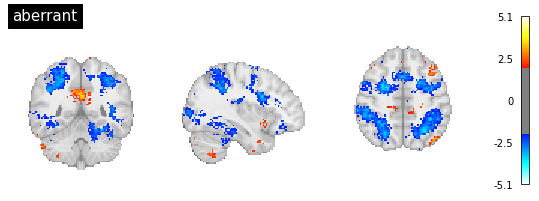

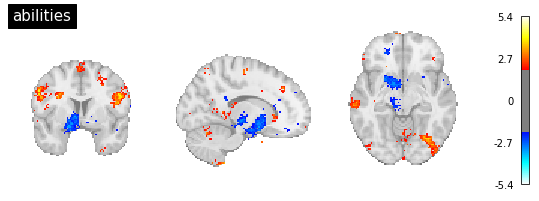

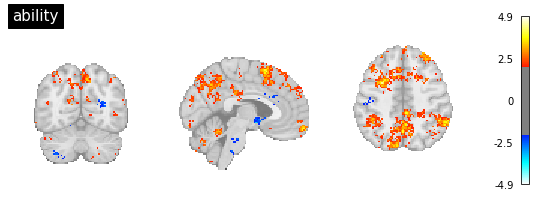

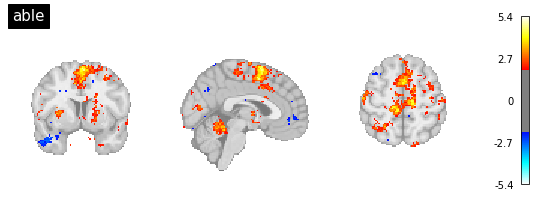

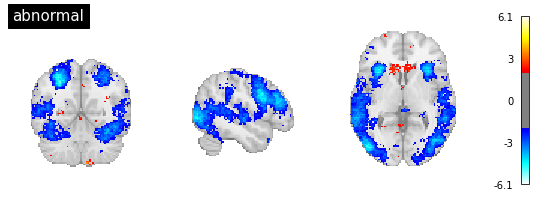

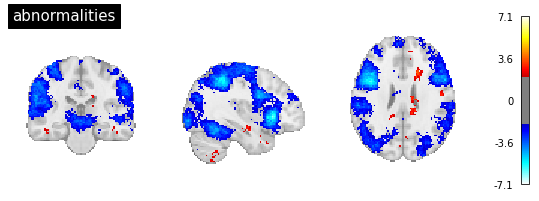

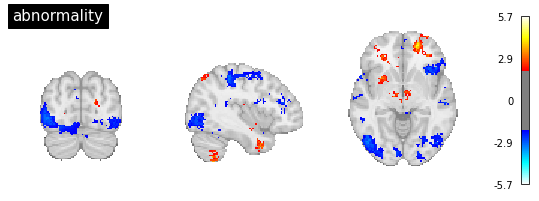

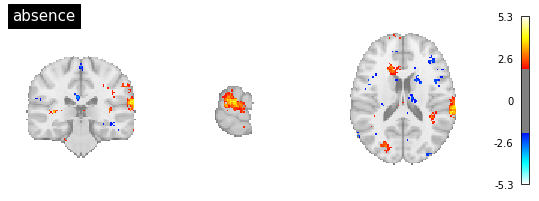

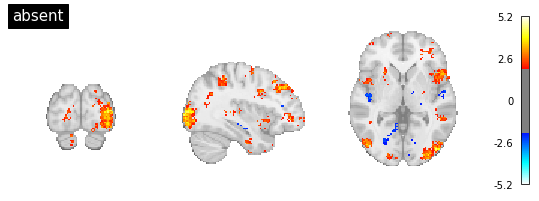

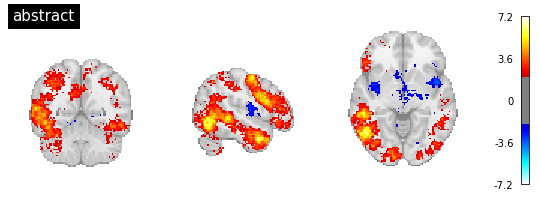

In [11]:
term_based_ns_decoder_fn = op.join(output_dir, f"term_neurosynth_decoder.pkl.gz")
# For Neurosynth n_init=60, to plot features with names
plot_meta_maps(term_based_ns_decoder_fn, n_init=60)

## LDA-based Meta-Analysis

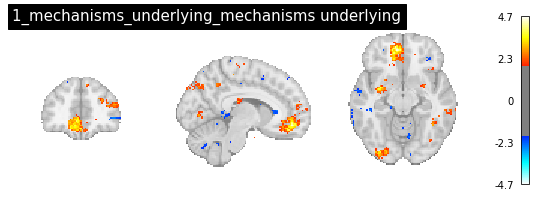

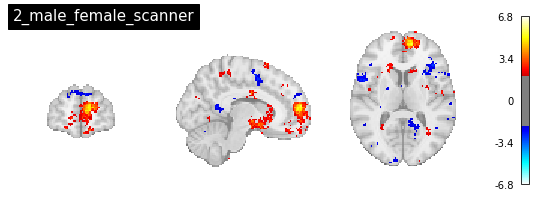

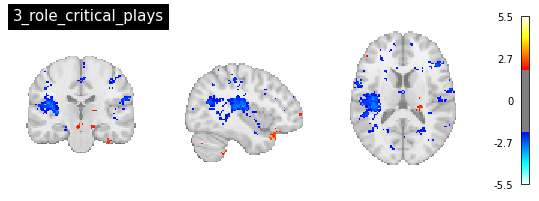

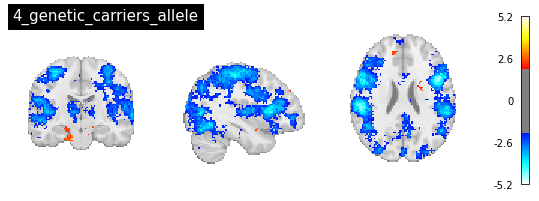

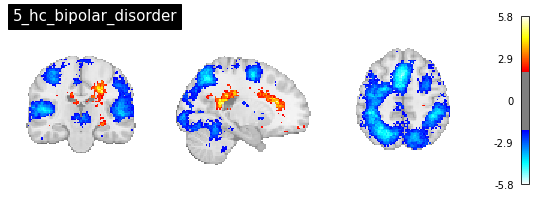

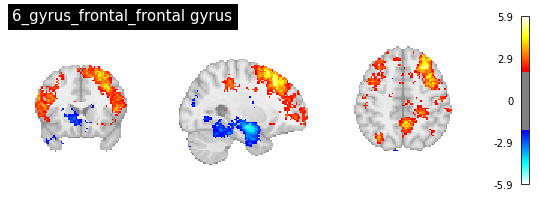

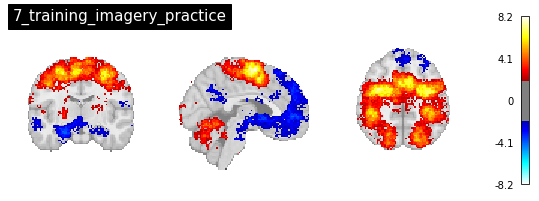

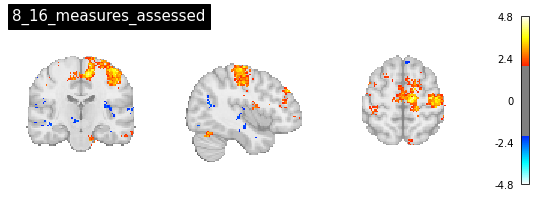

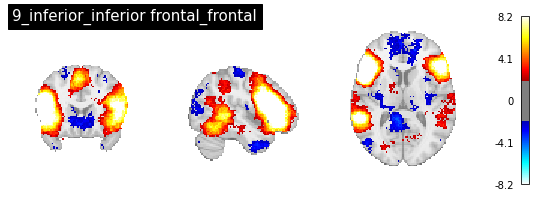

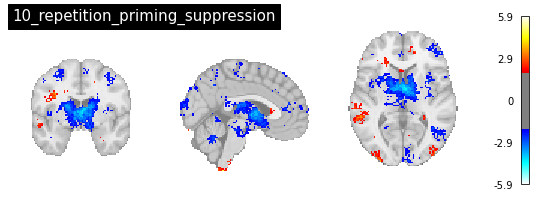

In [5]:
lda_based_ns_decoder_fn = op.join(output_dir, f"lda_neurosynth_decoder.pkl.gz")
plot_meta_maps(lda_based_ns_decoder_fn)

## GCLDA-based Meta-Analysis

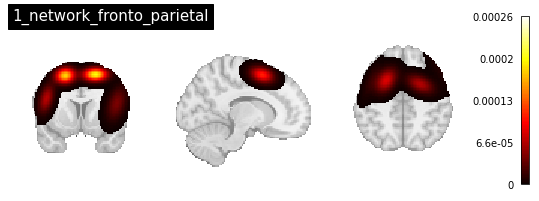

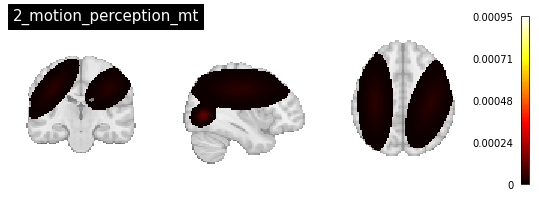

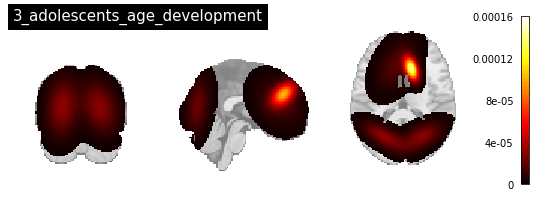

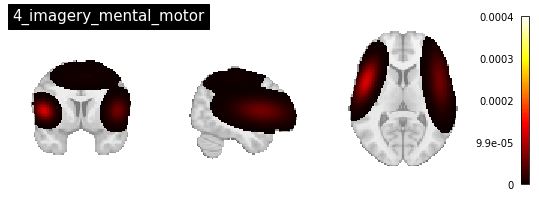

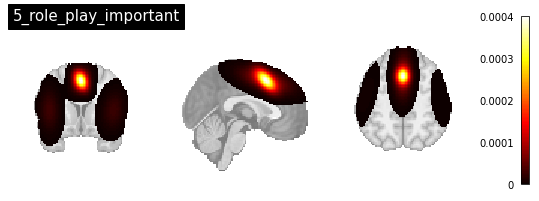

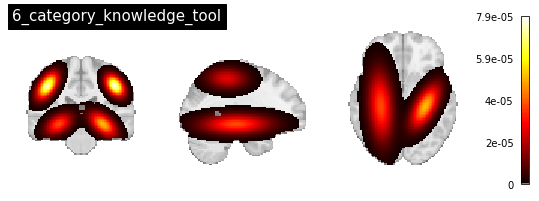

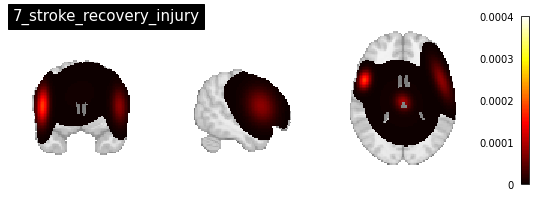

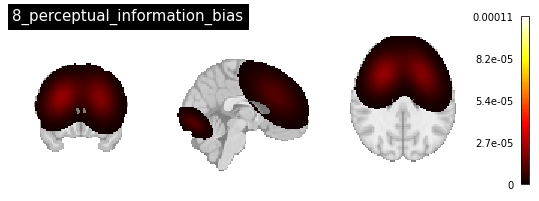

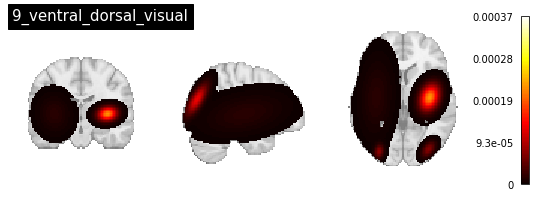

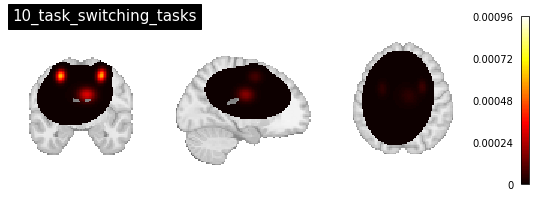

In [6]:
gclda_based_ns_decoder_fn = op.join(output_dir, "gclda_neurosynth_model.pkl.gz")
plot_meta_maps(gclda_based_ns_decoder_fn, threshold=0.000001, model="gclda")

### Test MNI to fsLR transform

In [5]:
decoder_file = gzip.open(gclda_based_ns_decoder_fn, "rb")
decoder = pickle.load(decoder_file)

topic_word_weights = decoder.p_word_g_topic_
n_topics = topic_word_weights.shape[1]
vocabulary = np.array(decoder.vocabulary)
sorted_weights_idxs = np.argsort(-topic_word_weights, axis=0)
top_tokens = [
    "_".join(vocabulary[sorted_weights_idxs[:, topic_i]][:3])
    for topic_i in range(n_topics)
]
features = [f"{i + 1}_{top_tokens[i]}" for i in range(n_topics)]

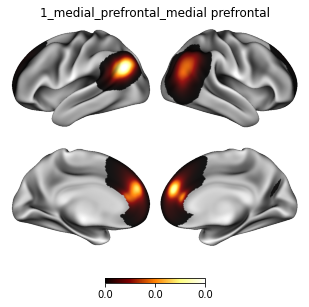

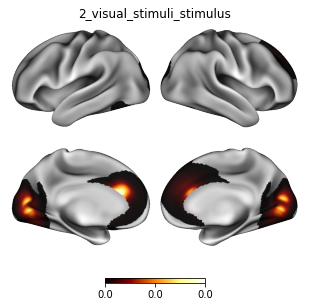

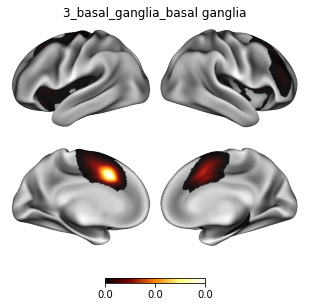

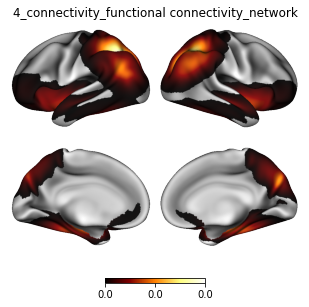

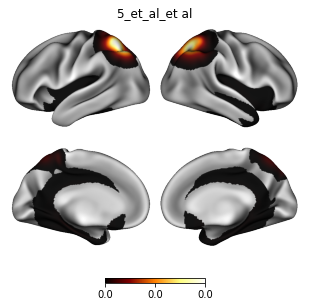

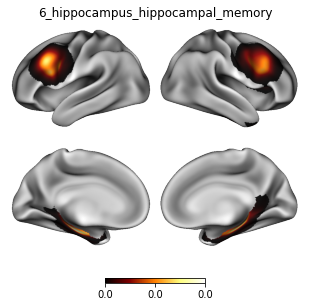

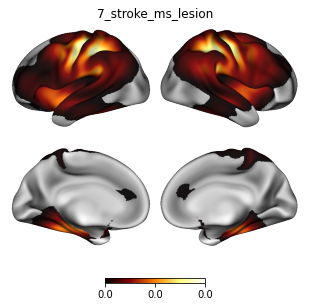

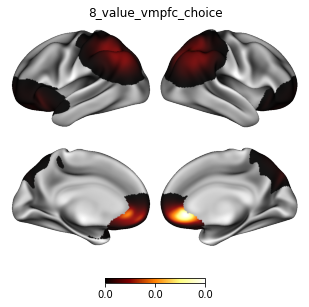

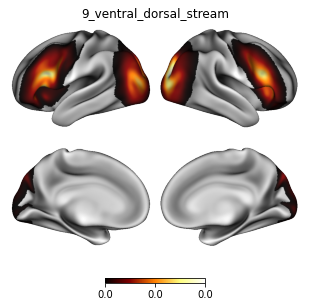

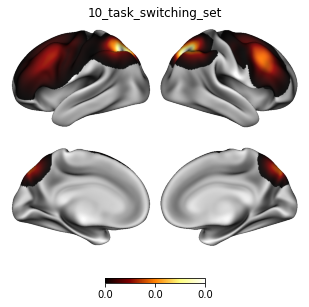

In [6]:
gclda_grad_path = op.join(output_dir, "gclda-fslr")
gclda_grad_lh_fnames = sorted(glob(op.join(gclda_grad_path, "*hemi-L_feature.func.gii")))
gclda_grad_rh_fnames = sorted(glob(op.join(gclda_grad_path, "*hemi-R_feature.func.gii")))
gclda_subcort_grad_fnames = sorted(glob(op.join(gclda_grad_path, "*_feature.nii.gz")))
gclda_grad_fnames = zip(gclda_grad_lh_fnames[:10], gclda_grad_rh_fnames[:10])
features_to_plot = features[:10]

plot_gradient("../data", gclda_grad_fnames, features_to_plot, threshold_=0.000001, cmap="afmhot")

# NeuroQuery

## Term-based Meta-Analysis

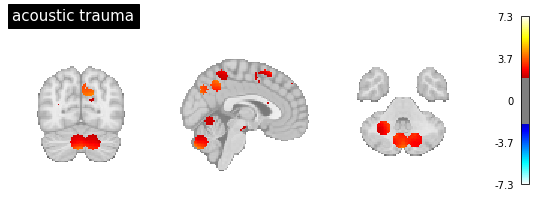

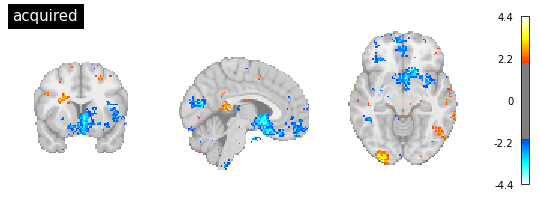

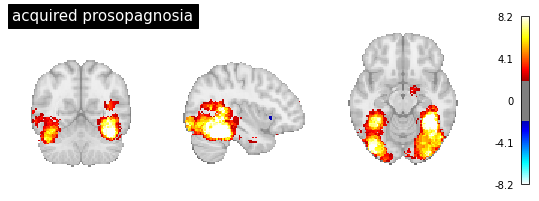

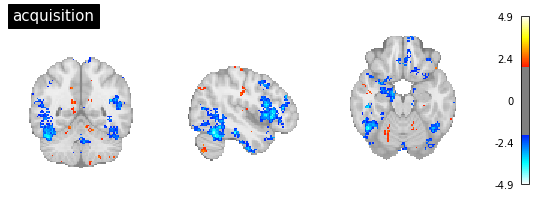

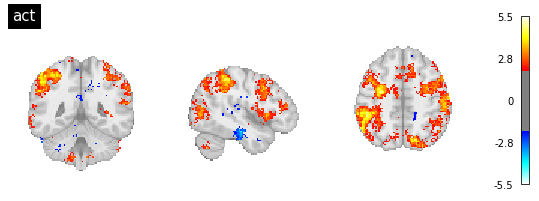

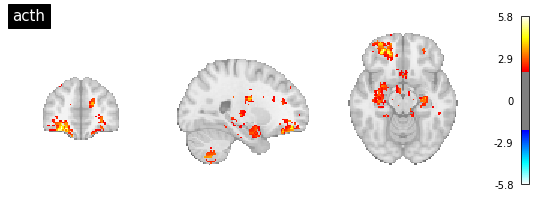

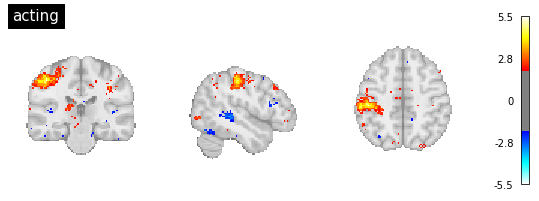

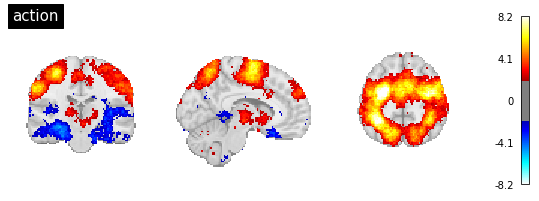

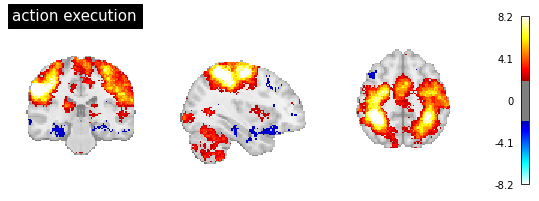

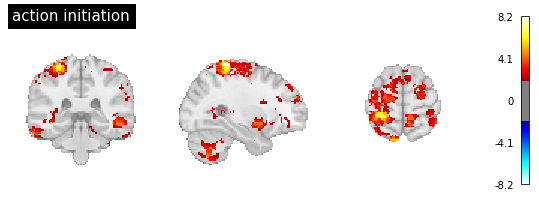

In [7]:
term_based_nq_decoder_fn = op.join(output_dir, f"term_neuroquery_decoder.pkl.gz")
# For NeuroQuery n_init=60, to plot features with names
plot_meta_maps(term_based_nq_decoder_fn, n_init=60)

## LDA-based Meta-Analysis

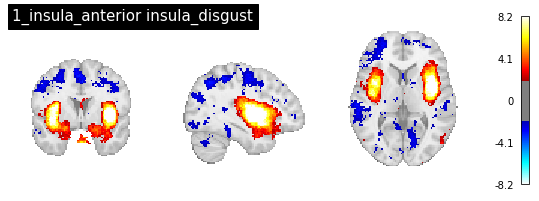

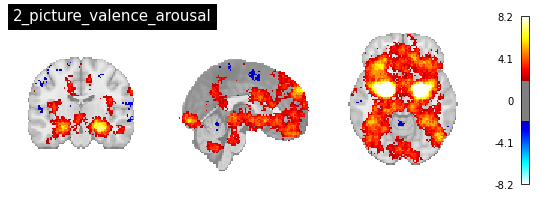

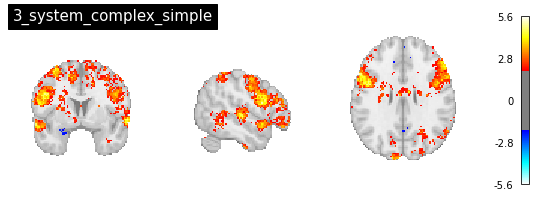

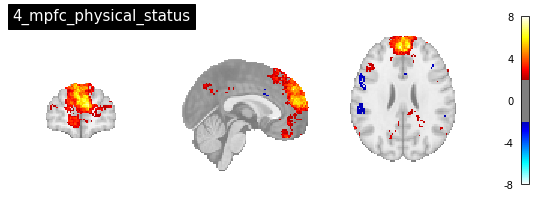

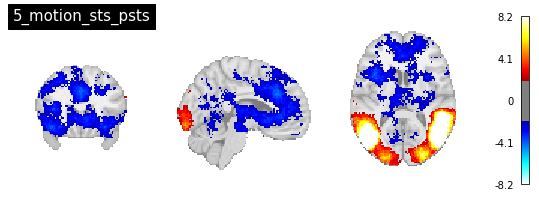

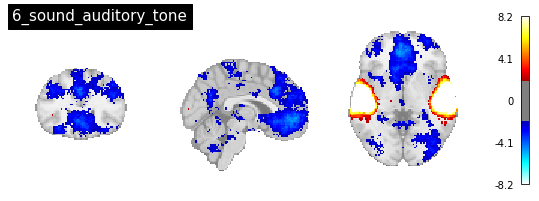

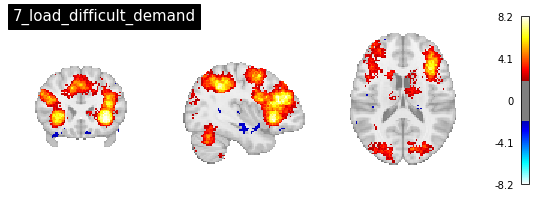

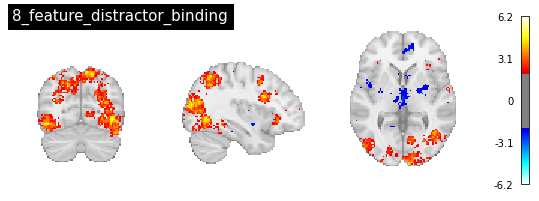

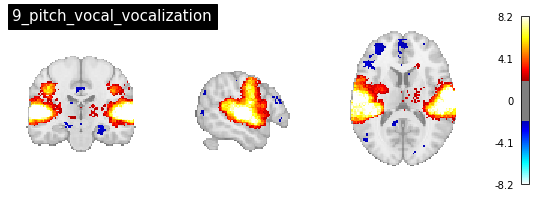

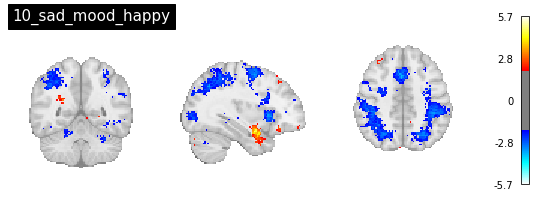

In [8]:
lda_based_nq_decoder_fn = op.join(output_dir, f"lda_neuroquery_decoder.pkl.gz")
plot_meta_maps(lda_based_nq_decoder_fn)

## GCLDA-based Meta-Analysis

In [ ]:
gclda_based_nq_decoder_fn = op.join(output_dir, "gclda_neuroquery_model.pkl.gz")
plot_meta_maps(gclda_based_nq_decoder_fn, threshold=0.000001, model="gclda")